In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## scaler

In [133]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [134]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [136]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [9]:
x.shape

(10, 1)

In [10]:
y.shape

(10,)

In [11]:
y=y.reshape(len(y),1)
y.shape

(10, 1)

In [12]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()

In [13]:
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)

In [14]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [15]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [113]:
from sklearn.svm import SVR
regresser=SVR(kernel='rbf')
regresser.fit(x,y)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [114]:
xx=regresser.predict(sc_x.transform([[5.5]]))

In [115]:
xx

array([-0.41686141])

In [116]:
xx=xx.reshape(-1,1)

In [117]:
sc_y.inverse_transform(xx)

array([[131106.77303274]])

In [118]:
xy=regresser.predict([[5.5]])

In [119]:
xy

array([0.01158123])

## visualising

In [120]:
sc_x.inverse_transform(x)

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [121]:
sc_y.inverse_transform(regresser.predict(x).reshape(-1,1))

array([[ 73474.15615697],
       [ 70786.94584626],
       [ 88213.00902103],
       [108254.98574956],
       [122574.52250599],
       [145503.10688572],
       [209410.23132923],
       [330606.89204569],
       [471671.95587315],
       [557821.75899897]])

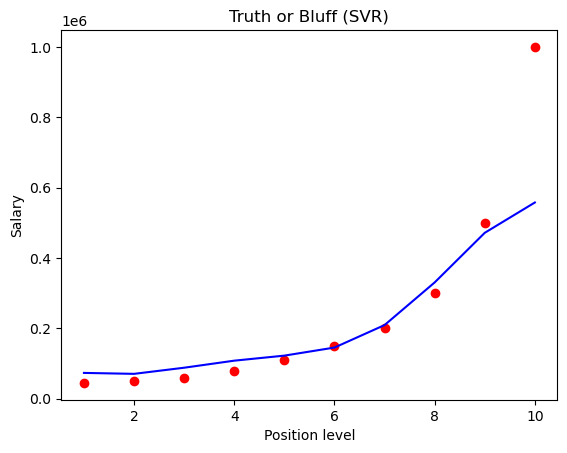

In [122]:
plt.scatter(sc_x.inverse_transform(x.reshape(-1,1)), sc_y.inverse_transform(y.reshape(-1,1)), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regresser.predict(x).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## non scaler

In [123]:
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1:].values

In [124]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [125]:
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [126]:
from sklearn.svm import SVR
regresser=SVR(kernel='rbf')
regresser.fit(X,Y)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [127]:
xy=regresser.predict([[7.5]])

In [128]:
xy

array([130003.11893457])

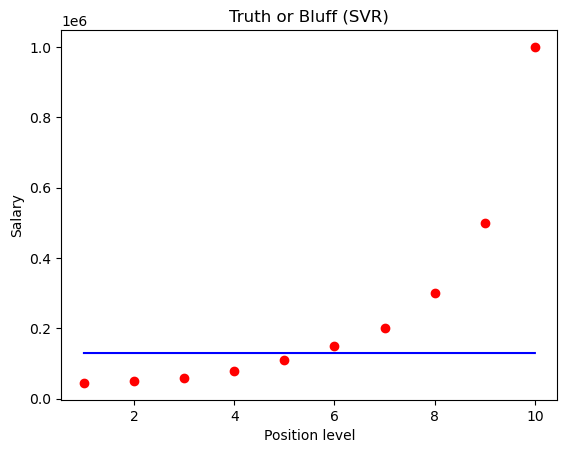

In [129]:
plt.scatter(X,Y, color = 'red')
plt.plot(X,regresser.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()